# Домашнее задание №3

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица Indian liver pations records.

Загрузить датасет https://www.kaggle.com/uciml/indian-liver-patient-records. 

In [96]:
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Dataset: пациент с болезнью печени - 1,
         пациент не болеет - 2

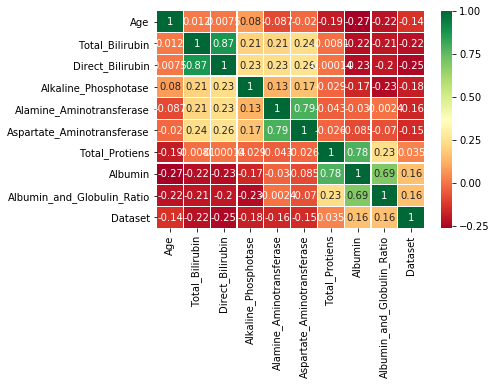

In [3]:
sns.heatmap(data.corr(), annot=True,cmap='RdYlGn',linewidths=0.2)

Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin, предварительно разделив данные на 80% тренировочных и 20% тестовых. Построить график: исходных тренировочных и тестовых данных, а также прямой линейной регрессии.

In [61]:
X = data.drop('Total_Bilirubin', axis=1)
y = data.Total_Bilirubin

In [62]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [65]:
X_train_Direct = X_train[['Direct_Bilirubin']]
X_test_Direct = X_test[['Direct_Bilirubin']]

In [66]:
X_train_Direct = np.array(X_train_Direct).reshape(-1, 1)
X_test_Direct = np.array(X_test_Direct).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [67]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [68]:
model.fit(X_train_Direct, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
model.score(X_test_Direct, y_test)

0.9740789964779888

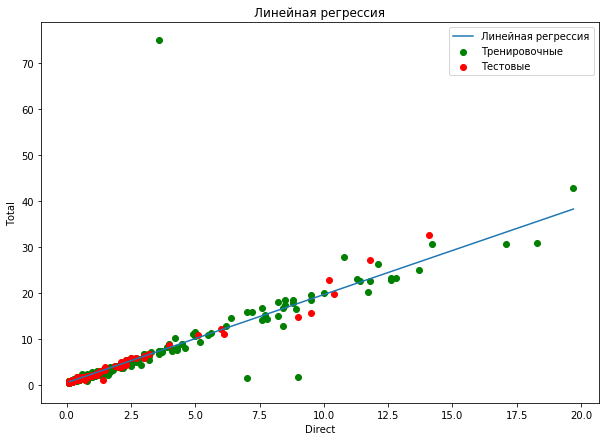

In [70]:
fig=plt.gcf()
fig.set_size_inches(10,7)
plt.scatter(X_train_Direct, y_train, c='g')
plt.scatter(X_test_Direct, y_test, c='r')
x = np.linspace(min(X_train_Direct), max(X_train_Direct), 100)
y = (model.coef_*x + model.intercept_)
plt.plot(x, y)
plt.title('Линейная регрессия')
plt.xlabel('Direct')
plt.ylabel('Total')
plt.legend(['Линейная регрессия', 'Тренировочные', 'Тестовые'])

Построить одномерную полиномиальную регрессию на Direct_Bilirubin и Total_Bilirubin, используя тренировочные и тестовые данные из шага выше. Проверить точность предсказаний на тестовых данных. Получилось ли улучшить результат?

In [71]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_poly = poly_reg.fit_transform(X_train_Direct)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

pol_reg.score(poly_reg.fit_transform(X_test_Direct), y_test)

0.971752169618836

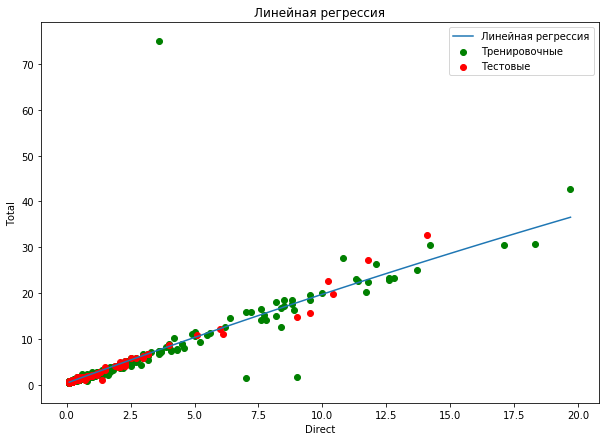

In [72]:
fig=plt.gcf()
fig.set_size_inches(10,7)
x = np.linspace(min(X_test_Direct), max(X_train_Direct), 100)
y = pol_reg.predict(poly_reg.fit_transform(x))
plt.plot(x, y)
plt.scatter(X_train_Direct, y_train, c='g')
plt.scatter(X_test_Direct, y_test, c='r')
plt.title('Линейная регрессия')
plt.xlabel('Direct')
plt.ylabel('Total')
plt.legend(['Линейная регрессия', 'Тренировочные', 'Тестовые'])

Полиномиальная регрессия не улучшает точность. Полагаю, из за того, что данные имею сильную линейную зависимость, и именно ленейная регрессия в данном случаем является самой подходящей.  При увеличении степени, точность будет ухудшаться. 

Построить многомерную **логистическую регрессию** для предсказания болезни (Dataset) от всех параметров, предварительно разделив данные на 80% тренировочных и 20% тестовых. Сделать классификационный отчет (куда включить количество найденных параметров true positive и false negative). Посмотреть какой получился результат.

Улучшить модель за счет уменьшения параметров, отобранных для обучения модели. Выбрать только те атрибуты, которые коррелируют с таргет значением (атрибут Dataset) более 50% (нужно будет построить матрицу корреляций и посмотреть в ней параметры, наиболее коррелирующие с Dataset атрибутом). Проверить модель на тестовых данных, полученных выше. Построить классификационный отчет, сделать сравнение двух моделей по этим классификационным отчетам.

In [97]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [106]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [103]:
len(data)

583

In [107]:
# удалил строки с отсутствующими значениями

data = data.dropna()

In [109]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [110]:
# заменил строковые данные в столбце Gender  на числовые

data.Gender.replace(['Male', 'Female'], [1, 0], inplace=True)

In [111]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [112]:
X = data.drop('Dataset', axis=1)
y = data.Dataset

In [113]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [114]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [115]:
from sklearn.metrics import classification_report

model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           1       0.74      0.95      0.84        85
           2       0.43      0.10      0.16        31

    accuracy                           0.72       116
   macro avg       0.59      0.52      0.50       116
weighted avg       0.66      0.72      0.65       116



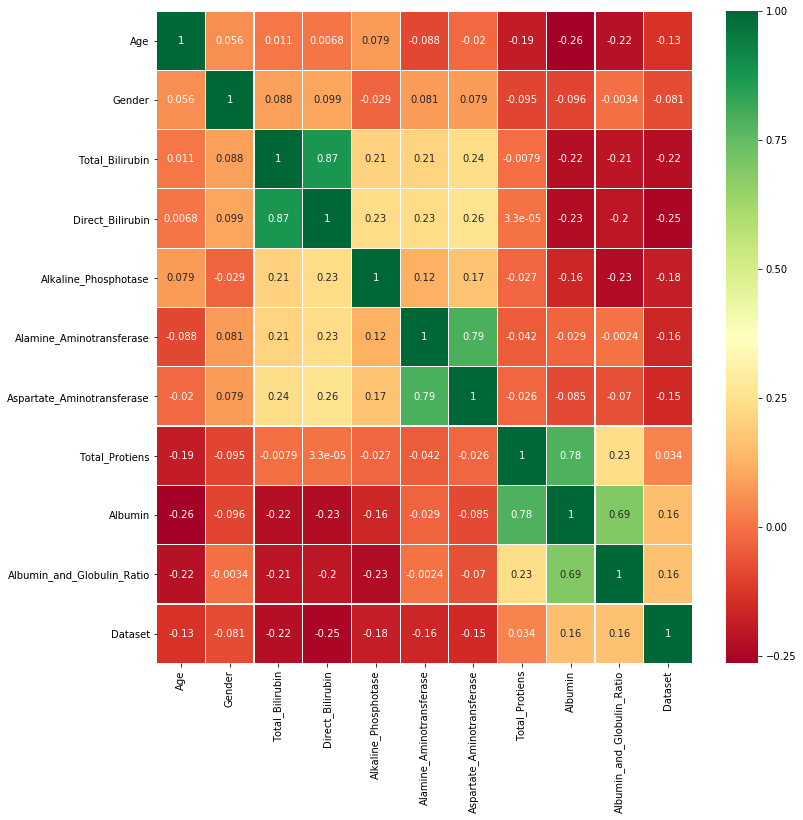

In [120]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)

In [133]:
data_new = data[['Total_Bilirubin', 'Direct_Bilirubin', 'Dataset']]

In [134]:
X = data_new.drop('Dataset', axis=1)
y = data_new.Dataset

In [139]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

In [140]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [142]:
from sklearn.metrics import classification_report

model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           1       0.72      1.00      0.84       126
           2       0.00      0.00      0.00        48

    accuracy                           0.72       174
   macro avg       0.36      0.50      0.42       174
weighted avg       0.52      0.72      0.61       174



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Посчитать квартили для всех колонок. 

In [132]:
data.quantile([0.25,0.50,0.75])

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.25,33.0,1.0,0.8,0.2,175.5,23.0,25.0,5.8,2.6,0.70,1.0
0.50,45.0,1.0,1.0,0.3,208.0,35.0,42.0,6.6,3.1,0.93,1.0
0.75,58.0,1.0,2.6,1.3,298.0,61.0,87.0,7.2,3.8,1.10,2.0


Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

In [143]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [147]:
data_less_50 = data[data['Age'] <= 50]

In [149]:
less = data_less_50.Dataset

(array([257.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 116.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

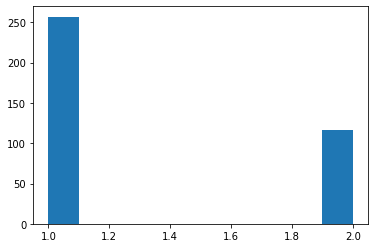

In [150]:
plt.hist(less)

In [157]:
data_more_50 = data[data.Age > 50]

In [158]:
more = data_more_50.Dataset

(array([257.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 116.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

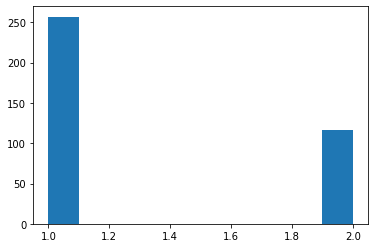

In [189]:
plt.hist(more)

In [165]:
print('less: quantile', less.quantile([0.50]), 'mean', )

less: quantile 0.5    1.0
Name: Dataset, dtype: float64


In [186]:
print('less', '\n', less.describe()[['mean','50%']])
print('more', '\n', more.describe()[['mean','50%']])

less 
 mean    1.310992
50%     1.000000
Name: Dataset, dtype: float64
more 
 mean    1.237864
50%     1.000000
Name: Dataset, dtype: float64


Полагаю, что в возрасте до 50 лет с заболеванием больше, чем после 50


Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность?

In [192]:
data_bilirubin = data[data.Dataset == 2]['Total_Bilirubin']

In [194]:
stats.ttest_1samp(data_bilirubin, data.Dataset.mean())

Ttest_1sampResult(statistic=-1.782808420523744, pvalue=0.0764673356544444)

Видим что отстутствует статистическая значимость между болезнью и уровнем общего билирубина. значение р выше 0,05 что не позволяет говорить о 

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?

In [201]:
good_health = data[data.Dataset == 1]['Total_Bilirubin']

In [212]:
bad_health = data[data.Dataset == 2]['Total_Bilirubin']

In [213]:
stats.ttest_ind(good_health, bad_health)

Ttest_indResult(statistic=5.422946004172417, pvalue=8.632557516910643e-08)

Принимаем гипотезу, что отсутствуют статистические различия билирубина у здоровых и больных

Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

In [219]:
young = data[data.Age < 30]['Dataset']

middle = data[(data.Age > 30) & (data.Age < 55)]['Dataset']

old = data[data.Age >= 30]['Dataset']

In [225]:
# ANOVA

stats.f_oneway(young, middle, old)

F_onewayResult(statistic=9.862564751476283, pvalue=5.819014858715886e-05)

Вопросы задавать на почту yustiks@gmail.com